## This program develops the ML model for predictiong the rail temperature

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [4]:
import xgboost as xgb
from xgboost import XGBRegressor


In [5]:
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [6]:
df =  pd.read_csv(r'/home/daniel/projects/rails/data/rail_temperatures_mos_data.csv', sep = ',')
df.shape

(3216227, 27)

In [7]:
df.isnull().sum()

lat                0
lon                0
analysis_date      0
analysis_time      0
forecast_time      0
forecast_period    0
MSL                0
T2                 0
D2                 0
U10                0
V10                0
LCC                0
MCC                0
SKT                0
cosmonth           0
sinmonth           0
coshour            0
sinhour            0
hourly_SRR         0
hourly_STR         0
hourly_SLHF        0
hourly_SSHF        0
X                  0
Y                  0
Timestamp          0
TAir               0
TRail              0
dtype: int64

In [7]:
df.dtypes

lat                float64
lon                float64
analysis_date       object
analysis_time        int64
forecast_time       object
forecast_period      int64
MSL                float64
T2                 float64
D2                 float64
U10                float64
V10                float64
LCC                float64
MCC                float64
SKT                float64
cosmonth           float64
sinmonth           float64
coshour            float64
sinhour            float64
hourly_SRR         float64
hourly_STR         float64
hourly_SLHF        float64
hourly_SSHF        float64
X                    int64
Y                    int64
Timestamp           object
TAir               float64
TRail              float64
dtype: object

In [8]:
(min(df.TRail), max(df.TRail))

(-29.0, 50.0)

In [9]:
cols = df.select_dtypes(include=[np.float64]).columns
cols
df[cols] = df[cols].astype(np.float32)
df.dtypes

lat                float32
lon                float32
analysis_date       object
analysis_time        int64
forecast_time       object
forecast_period      int64
MSL                float32
T2                 float32
D2                 float32
U10                float32
V10                float32
LCC                float32
MCC                float32
SKT                float32
cosmonth           float32
sinmonth           float32
coshour            float32
sinhour            float32
hourly_SRR         float32
hourly_STR         float32
hourly_SLHF        float32
hourly_SSHF        float32
X                    int64
Y                    int64
Timestamp           object
TAir               float32
TRail              float32
dtype: object

In [10]:
cols = df.select_dtypes(include=[np.int64]).columns
cols
df[cols] = df[cols].astype(np.int32)
df.dtypes

lat                float32
lon                float32
analysis_date       object
analysis_time        int32
forecast_time       object
forecast_period      int32
MSL                float32
T2                 float32
D2                 float32
U10                float32
V10                float32
LCC                float32
MCC                float32
SKT                float32
cosmonth           float32
sinmonth           float32
coshour            float32
sinhour            float32
hourly_SRR         float32
hourly_STR         float32
hourly_SLHF        float32
hourly_SSHF        float32
X                    int32
Y                    int32
Timestamp           object
TAir               float32
TRail              float32
dtype: object

In [11]:
df.columns

Index(['lat', 'lon', 'analysis_date', 'analysis_time', 'forecast_time',
       'forecast_period', 'MSL', 'T2', 'D2', 'U10', 'V10', 'LCC', 'MCC', 'SKT',
       'cosmonth', 'sinmonth', 'coshour', 'sinhour', 'hourly_SRR',
       'hourly_STR', 'hourly_SLHF', 'hourly_SSHF', 'X', 'Y', 'Timestamp',
       'TAir', 'TRail'],
      dtype='object')

In [12]:
# Rail temp in degree celsius
df.TRail

0          14.0
1          14.0
2          14.0
3          14.0
4          14.0
           ... 
3216222    -2.0
3216223    -2.0
3216224    -2.0
3216225    -3.0
3216226    -3.0
Name: TRail, Length: 3216227, dtype: float32

In [13]:
# converting T2, D2 and SKT to degree celsius
df.T2= df['T2'] - 273.15
df.D2 = df['D2'] - 273.15
df.SKT = df['SKT'] - 273.15

In [14]:
xvar = ['lat', 'lon','forecast_period', 'T2', 'D2', 'SKT','U10', 'V10', 
        'sinhour', 'hourly_SRR','hourly_STR', 'hourly_SLHF', 
        'hourly_SSHF']


In [15]:
X = df.loc[:, xvar]
y = df.loc[:,'TRail']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2572981, 13) (643246, 13) (2572981,) (643246,)


In [19]:
# This dataframe we use to plot the graph of RMSE vs forecast_period
df_test = pd.concat([X_test, y_test], axis = 1)
df_test

,lat,lon,forecast_period,T2,D2,SKT,U10,V10,sinhour,hourly_SRR,hourly_STR,hourly_SLHF,hourly_SSHF,TRail
2831505,64.879318,25.503368,240,1.950012,-1.949982,1.850006,5.8,3.1,0.00,2.576933e+05,-43820.667969,-96664.164062,-65654.414062,19.0
1020649,60.907742,27.283697,192,0.850006,-2.449982,1.149994,-3.2,-6.6,0.00,3.276387e+05,-47998.000000,-184214.500000,-103102.500000,13.0
2109232,61.044735,26.736919,56,8.450012,6.550018,8.149994,-3.3,1.5,-0.87,0.000000e+00,-126818.500000,-35324.699219,93416.203125,10.0
3014809,64.552910,27.160814,66,0.250000,-2.850006,-0.649994,6.5,0.1,1.00,0.000000e+00,-252907.000000,-73574.296875,341616.000000,-3.0
2423120,62.487370,27.195679,192,1.850006,-5.549988,1.950012,2.8,-0.9,0.00,8.522920e+05,-311593.000000,-85627.164062,-359346.656250,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044667,60.907848,27.285547,39,1.550018,0.450012,1.450012,1.7,5.7,-0.71,0.000000e+00,-109764.500000,-2174.399902,167160.000000,0.0
1190592,63.891666,23.854307,228,1.350006,-1.350006,1.450012,-1.7,0.1,0.00,1.644003e+05,-62785.332031,-37316.500000,-40323.714844,12.0
1044912,60.907742,27.283697,70,19.850006,6.649994,20.550018,-1.0,-0.5,0.50,1.774068e+06,-238232.000000,-559792.000000,-754267.000000,28.0
2622483,62.487370,27.195679,30,15.149994,12.350006,14.950012,1.9,0.9,-1.00,1.147140e+05,-94460.000000,-230722.000000,32003.000000,19.0


In [20]:
# create scaling object based on X_train and scale both X_train and X_text
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit scaler to training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# only xgb
regressor = xgb.XGBRegressor(n_estimators=100, max_depth=11, eta=0.3, subsample=0.7, colsample_bytree=0.8)


In [22]:
regressor.fit(X_train, y_train)

y_trP = regressor.predict(X_train)
y_tsP = regressor.predict(X_test)

print('XGB train error:', mean_squared_error(y_train,y_trP,squared=False))
print('XGB test error:', mean_squared_error(y_test,y_tsP,squared=False))


XGB train error: 2.6175382
XGB test error: 2.8395302


In [23]:
# to plot the RMSE vs lead time

ajat = sorted(df_test['forecast_period'].unique().tolist())
print(ajat)

xgb_error = [None] * len(ajat)
for i in range(0,len(ajat)):
    tmp = df_test[df_test['forecast_period'] == ajat[i]]
    
    df_x_test_ajat = tmp.drop('TRail', axis =1)
    x_test_ajat = scaler.transform(df_x_test_ajat)
    y_test_ajat = tmp['TRail']
    y_xgb_ajat = regressor.predict(x_test_ajat)
    xgb_error[i] = mean_squared_error(y_test_ajat,y_xgb_ajat,squared=False)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228, 234, 240]


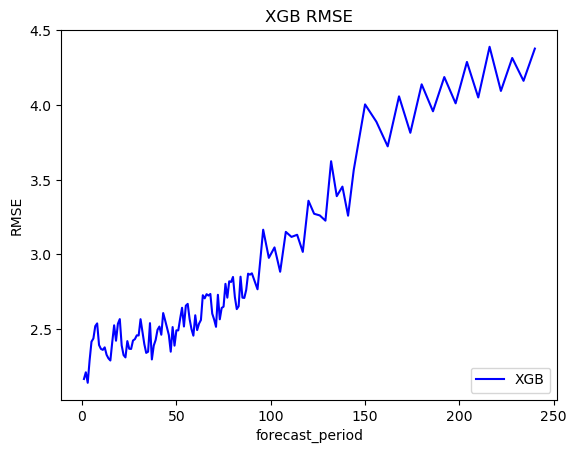

In [24]:
plt.plot(ajat, xgb_error, 'b', label="XGB")
plt.title("XGB RMSE")
plt.xlabel("forecast_period")
plt.ylabel("RMSE")
plt.legend(loc="lower right")

In [47]:
param = 'TRail'
plt.savefig('XGB_forecast_period_' + param + '_rmse.png')

<Figure size 640x480 with 0 Axes>

In [48]:
#Shap values
import shap
explainer = shap.Explainer(regressor.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 643247it [11:20:14, 15.76it/s]                                                                


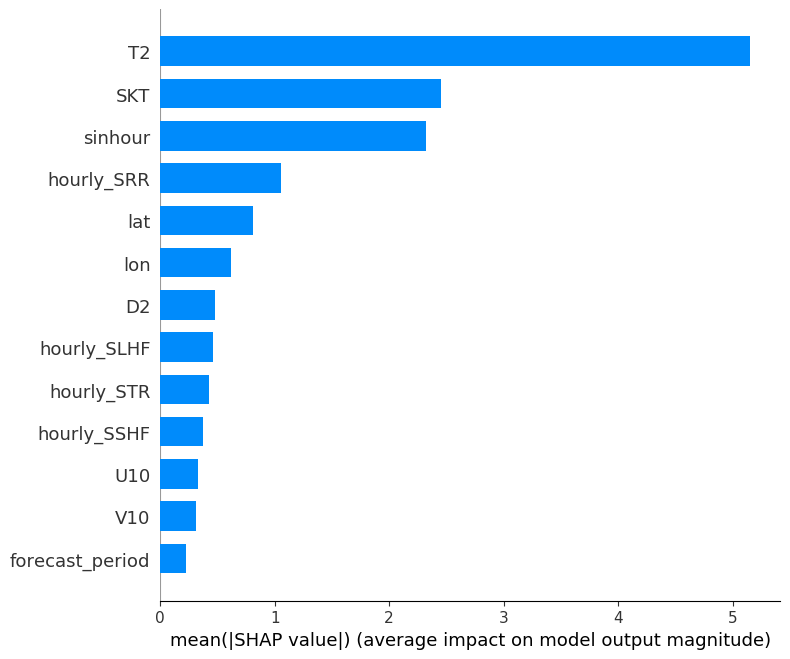

In [49]:
feature_names=X.columns.tolist()
feature_names

shap.summary_plot(shap_values, X_test,  feature_names=X.columns.tolist(),plot_type="bar", show = True)


In [ ]:
# RF and XGB refressor

In [25]:
RFregressor = RandomForestRegressor(n_estimators=100, max_features='sqrt',random_state=42, max_depth=10, min_samples_split=2, bootstrap=True, min_samples_leaf=1)


In [26]:
RFregressor.fit(X_train,y_train)
regressor.fit(X_train, y_train)

y_trRFP = RFregressor.predict(X_train)
y_tsRFP = RFregressor.predict(X_test)
y_trP = regressor.predict(X_train)
y_tsP = regressor.predict(X_test)


print('XGB train error:', mean_squared_error(y_train,y_trP,squared=False))
print('XGB test error:', mean_squared_error(y_test,y_tsP,squared=False))
print('RF train error:', mean_squared_error(y_train,y_trRFP,squared=False))
print('RF test error:', mean_squared_error(y_test,y_tsRFP,squared=False))


XGB train error: 2.6175382
XGB test error: 2.8395302
RF train error: 3.7846965963369805
RF test error: 3.799751484203457


In [27]:
LR = LinearRegression()
DT = DecisionTreeRegressor()

In [28]:
LR.fit(X_train,y_train)
DT.fit(X_train, y_train)

y_trLR = LR.predict(X_train)
y_tsLR = LR.predict(X_test)
y_trDT = DT.predict(X_train)
y_tsDT = DT.predict(X_test)


print('LR train error:', mean_squared_error(y_train,y_trLR,squared=False))
print('LR test error:', mean_squared_error(y_test,y_tsLR,squared=False))
print('DT train error:', mean_squared_error(y_train,y_trDT,squared=False))
print('DT test error:', mean_squared_error(y_test,y_tsDT,squared=False))

LR train error: 4.5042947384911844
LR test error: 4.5081821275799365
DT train error: 0.568562609155027
DT test error: 2.8768977221272505


In [30]:
#initialize
model_list = [LR, DT, RFregressor,regressor]

print(model_list)

[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42), XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=11, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)]


In [31]:
#Import a progress bar so we know how long it is taking
import tqdm 

for model in tqdm.tqdm(model_list):
    model.fit(X_train,y_train)

100%|████████████████████████████████████████████| 4/4 [08:42<00:00, 130.52s/it]


In [32]:
from gewitter_functions import get_mae,get_rmse,get_bias,get_r2

legend_labels = ['LR','DT','RF','GBT']
#loop over all trained models 
for idx,model in enumerate(model_list):
    #get predictions 
    yhat = model.predict(X_test)
 
    # get metrics
    mae = get_mae(y_test,yhat)
    rmse = get_rmse(y_test,yhat)
    bias = get_bias(y_test,yhat)
    r2 = get_r2(y_test,yhat)
    #print them out so we can see them 
    print(' Model: {} MAE:{} , RMSE:{} , Bias:{} , Rsquared:{}'.format(legend_labels[idx], np.round(mae,2),np.round(rmse,2),np.round(bias,2),np.round(r2,2)))


 Model: LR MAE:3.45 , RMSE:4.51 , Bias:-0.0 , Rsquared:0.85
 Model: DT MAE:1.61 , RMSE:2.88 , Bias:-0.0 , Rsquared:0.94
 Model: RF MAE:2.79 , RMSE:3.8 , Bias:0.0 , Rsquared:0.89
 Model: GBT MAE:2.0299999713897705 , RMSE:2.8399999141693115 , Bias:-0.0 , Rsquared:0.94
